# 1. gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Quick Question

## What is numpy and matplotlib?
## numpy : 수치연산 수행하는 라이브러리
## matplotlib : 데이터 시각화 라이브러리

In [3]:
# Let's make a linear function
def make_linear(w=0.5, b=0.8, size=50, noise=1.0): ## This is a 'function' name 'make_linear' - we're going to use this function later on
    x = np.random.rand(size) # random x
    y = w * x + b # y=wx+b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # random noise
    yy = y + noise # adding random noise to y
    plt.figure(figsize=(10, 7)) # plotting the figure - figure size
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}') # plot x in x-axis, y in y-axis, and label -- line plot
    plt.scatter(x, yy, label='data') ## plot x in x-axis, yy (y+noise) in y-axis -- scatter plot
    plt.legend(fontsize=20) ## setting legend's fontsize
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy ## The function make_linear will return the value x and yy in the end


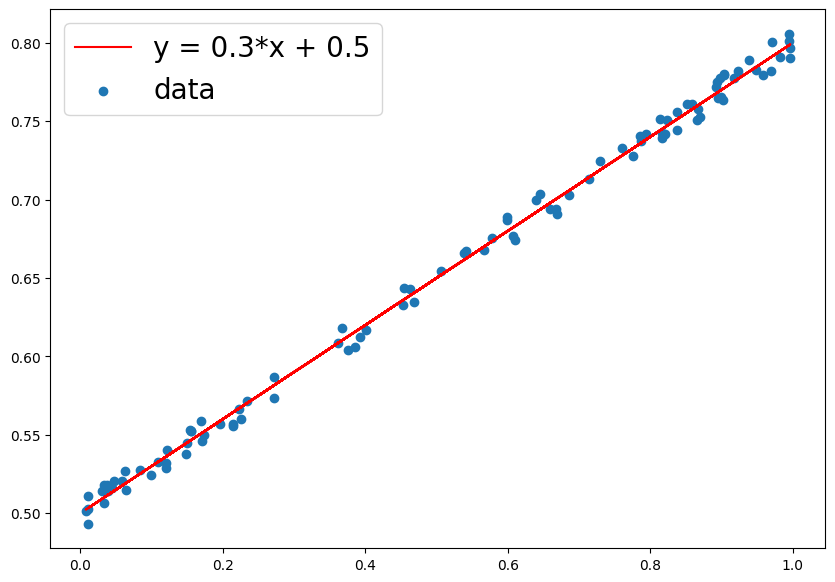

w: 0.3, b: 0.5


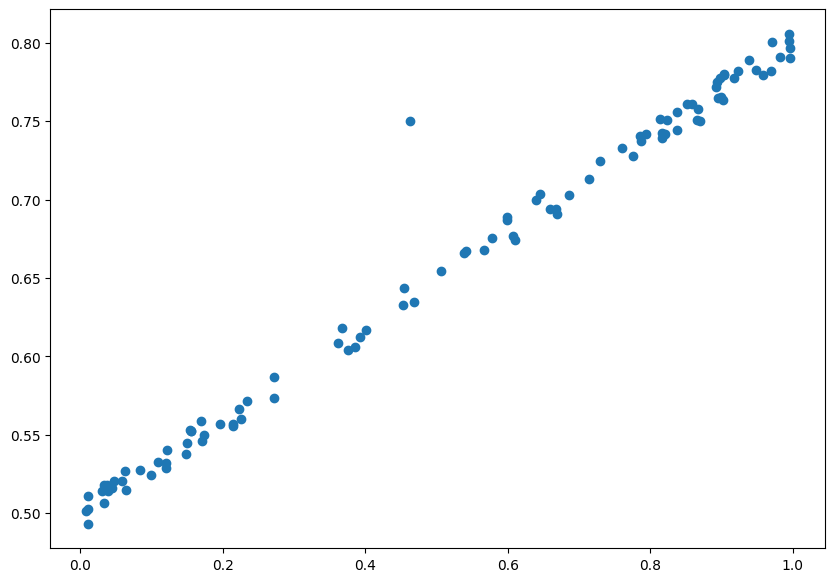

In [4]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01) ## Here we use the function make_linear -> first figure: line + scatter plot

## Intentionally making 1 outlier
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y) ## second figure: only scatter plot
plt.show()

In [5]:
## randomly choose w and b
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

In [6]:

## y_hat: prediction
y_hat = w * x + b
## Loss function
error = (y_hat - y) ** 2

In [7]:
## Quick Question
## (1) Write a name of the loss function above. HInt: _ _ _ Loss

## (2) Is it okay to use 'error = (y_hat-y)' or 'error = np.abs(y_hat-y)'?
## Write your own answer and justify your choice.

In [8]:
# Epoch (# of iterations)
num_epoch = 5000
# Learning rate
learning_rate = 0.5

In [9]:
## Quick Question
## (1) What is epoch? Google it and write your own answer in detail.
## 전체 data sets를 다 흝는 바퀴
## (2) What is learning rate? Google in and write your own answer.
## 학습 모델 파라미터

In [10]:
## Question 1
### line by line explanation
errors = []
# w, b: random initialization -- result may vary each time you execute the code
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)
## weight, bias // 둘 다 (-1, 1) 범위내

for epoch in range(num_epoch):
    y_hat = x * w + b
## for 반복문 -> epoch 수만큼 바퀴 -> outcome
    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break
## error나면 평균값으로 대신하겠다

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
## 둘 다 error을 최소화 하기 위한 모델 학습과정

    errors.append(error)
## append = 추가 // error를 계속해서 갱신(줄여지는 방향으로)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
## epoch이 5의배수일때 // weight, bias, error를 출력하겠다

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.10012, b = 0.21722 error = 1.23827
------------------------------------------------------------
 5 w = 0.3, b = 0.5 error = 0.00026


.

# 2. numpy

In [7]:
import numpy as np
arr = no.array([1,2,3])
print(arr)

[1 2 3]


In [9]:
arr2 = np.array([[1,2,3], [4,5,6]]) # numpy array
print(arr2)

[[1 2 3]
 [4 5 6]]


In [10]:
arr3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [11]:
## Let's check their data type
print(type(arr))
print(type(arr2))
print(type(arr3))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
## .shape returns the shape of the numpy array
print(arr.shape) # vector
print(arr2.shape) # matrix
print(arr3.shape) # matrix

(3,)
(2, 3)
(3, 3)


In [13]:
## How to make numpy array more conveniently?
print(np.ones((2,3))) ## one
print(2*np.ones((2,3))) ## two

[[1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [14]:
print(np.zeros((2,3)))

[[0. 0. 0.]
 [0. 0. 0.]]


In [15]:
print(0*np.ones((2,3)))

[[0. 0. 0.]
 [0. 0. 0.]]


In [16]:
arr12 = np.ones((3,4))
print(arr12)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [17]:
arr12.reshape(1,12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [18]:
## But what if we do not know (or do not want to know; it's lazy... but anyway) the exact size of numpy array?
## Use -1
arr12.reshape(-1, 12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [50]:
arr_mixed = np.array([1,5,2,3])
print(np.sort(arr_mixed))

[1 2 3 5]


## Question 2. Sorting with numpy


* (1) We've just sorted the vector in increasing order. Can you sort the same vector in decreasing order?
* (2) Read the document for np.argsort (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html). Explain the numpy argsort function and execute the code with arr_mixed.

In [52]:
## (1) 내림차순 vector array
arr_mixed = np.array([1,5,2,3])
print(np.sort(arr_mixed)[::-1])

[5 3 2 1]


In [ ]:
## np.argosort(arr_mixed)를 사용하면 임의의 인덱스가 지정된다.
## 그리고 이것을 변수 sorted라고 지정하고 print하면 원래의 arr_mixed가 내림차순으로 정렬된다.
## 우리가 나중에 정렬된 배열의 index를 말할땐 sorted에서 임의로 지정된 인덱스로 명명한다.

.

In [20]:
# indexing
arr4 = np.array([5,2,3,4,6])
print(arr4[1])

2


In [21]:
# slicing
arr4[1:3]
# 1번 2번만 출력

array([2, 3])

In [22]:
## Quick Question
## Write a code that slices arr4 from 1st entry to 4th entry.
## HInt: including 1st entry, excluding 5th entry

## Your Answer
## arr4[1:5]

.

## 3. Matplotlib

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
x = [1,2,3]
print(x)

[1, 2, 3]


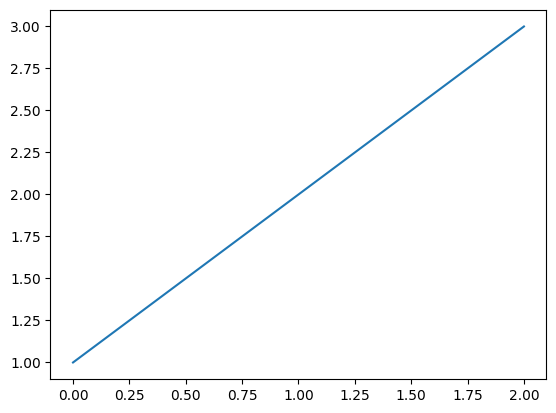

In [28]:
plt.plot(x)

.

In [29]:
x = [4, 5, 6]
y = [7, 8, 9]

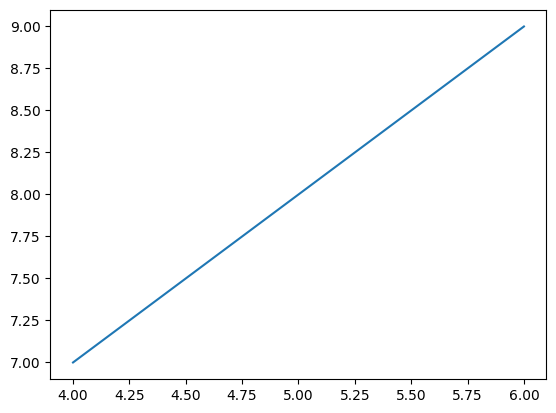

In [30]:
plt.plot(x, y)

.

In [31]:
np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

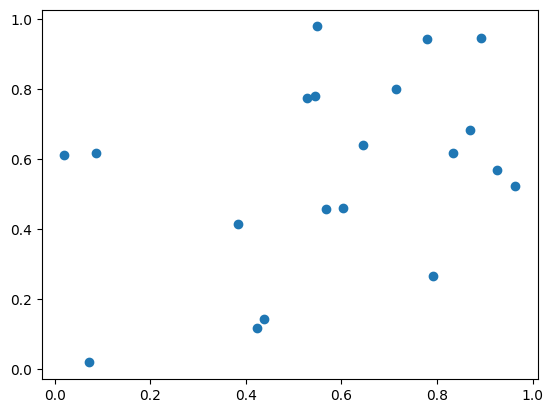

In [32]:
plt.scatter(x, y)
plt.show()

.

<ipython-input-45-71a5393658f0>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.5, cmap='Spectral')


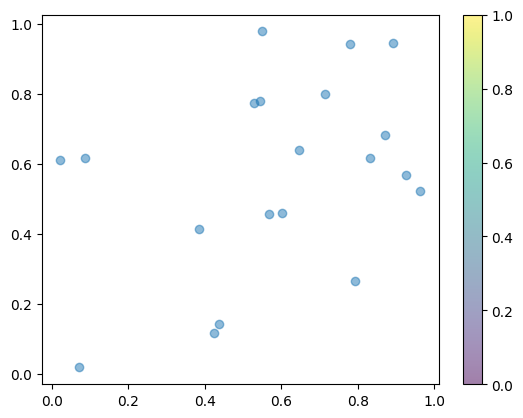

In [45]:
plt.scatter(x, y, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

## Question 3. Matplotlib

* (1) What is alpha and cmap above? Google it and write the answer.
* (2) Write and execute a code that has alpha=0.1. Can you see the difference?
* (3) Check the type of cmap and run the code that changed the type of cmap.


     

In [ ]:
## (1) alpha : (0,1)사이의 투명도를 나타내는 것이며 위의 그래프에서는 색깔별로 0에서 1 사이 값을 구별하고 있다
## cmap = color map


<ipython-input-34-b86251713af6>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.1, cmap='Spectral')


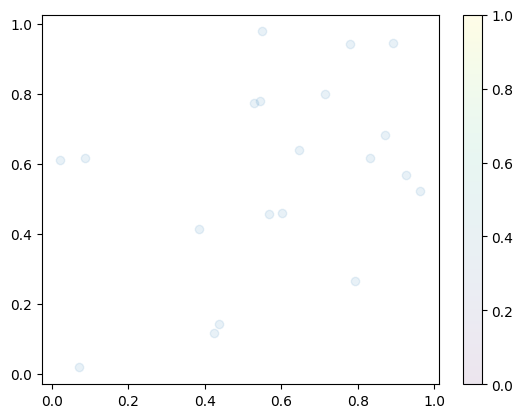

In [34]:
## (2) alpha=0.1일 경우. 차이 많이 난다
plt.scatter(x, y, alpha=0.1, cmap='Spectral')
plt.colorbar()
plt.show()

In [38]:
## (3) check the type of cmap
## c=colors 넣어줘야하니, colors 정의.
import matplotlib.pyplot
print(matplotlib.pyplot.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

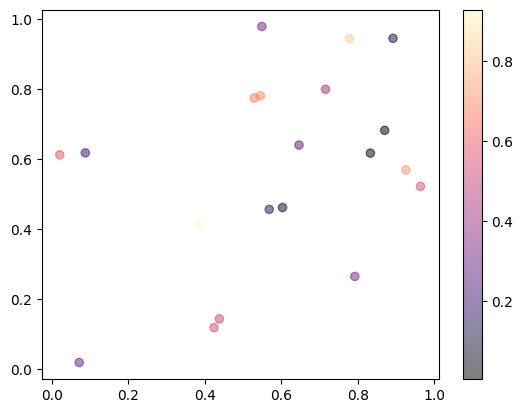

In [48]:
colors = np.random.rand(n)
plt.scatter(x, y, alpha=0.5, c=colors, cmap='magma')
plt.colorbar()
plt.show()